In [1]:
# import library.
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import data.
quality = pd.read_csv('../data/quality.csv')
quality.head(3).T

,0,1,2
MemberID,1,2,3
InpatientDays,0,1,0
ERVisits,0,1,0
OfficeVisits,18,6,5
Narcotics,1,1,3
DaysSinceLastERVisit,731.0,411.0,731.0
Pain,10,0,10
TotalVisits,18,8,5
ProviderCount,21,27,16
MedicalClaims,93,19,27


In [3]:
# target counts.
quality['PoorCare'].value_counts()

0    98
1    33
Name: PoorCare, dtype: int64

In [4]:
# baseline model by predicitng most frequent target class.
1 - (quality['PoorCare'].sum() / quality.shape[0])

0.7480916030534351

In [5]:
def make_predictions(features):
    # create train and test sets.
    X_train = quality[features].copy()
    y_train = quality['PoorCare'].copy()

    # fit model.
    quality_log = sm.Logit(y_train, sm.add_constant(X_train)).fit()
    print(quality_log.summary())
    print("AIC Score:",quality_log.aic.round(2))

    # get predictions.
    y_pred = quality_log.predict(sm.add_constant(X_train))
    y_results = y_train.to_frame()
    y_results['Predict'] = y_pred
    y_results.groupby('PoorCare')['Predict'].mean().round(3)

    # print confusion matrix.
    cfm = quality_log.pred_table()
    print(cfm)

    # plot roc curve.
    fpr, tpr, ths = metrics.roc_curve(y_train, y_pred)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC: {round(auc, 3)}")
    plt.legend()
    plt.grid()
    plt.show()

Optimization terminated successfully.
         Current function value: 0.444464
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               PoorCare   No. Observations:                  131
Model:                          Logit   Df Residuals:                      128
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Aug 2021   Pseudo R-squ.:                  0.2125
Time:                        21:32:51   Log-Likelihood:                -58.225
converged:                       True   LL-Null:                       -73.939
Covariance Type:            nonrobust   LLR p-value:                 1.497e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.5402      0.450     -5.644      0.000      -3.422      -1.658
OfficeVisits     0.0627

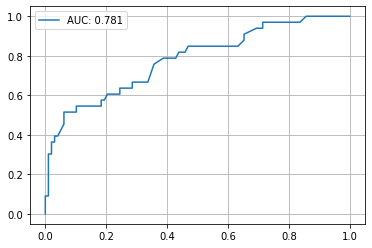

In [6]:
make_predictions(['OfficeVisits', 'Narcotics'])

## Quick Question
Create a logistic regression model to predict "PoorCare" using the independent variables "StartedOnCombination" and "ProviderCount". Use the training set we created in the previous video to build the model.

What is the coefficient for "StartedOnCombination"?
- 2.7119

Optimization terminated successfully.
         Current function value: 0.511762
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               PoorCare   No. Observations:                  131
Model:                          Logit   Df Residuals:                      128
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Aug 2021   Pseudo R-squ.:                 0.09330
Time:                        21:32:51   Log-Likelihood:                -67.041
converged:                       True   LL-Null:                       -73.939
Covariance Type:            nonrobust   LLR p-value:                  0.001009
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.0269      0.454     -4.463      0.000      -2.917      -1.137

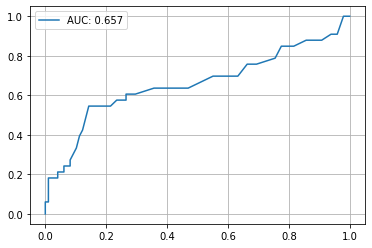

In [7]:
quality['StartedOnCombination'] = quality['StartedOnCombination'].astype(int)
make_predictions(['StartedOnCombination', 'ProviderCount'])